In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
from NeuroNet import *
%config InlineBackend.figure_formats=['svg']
plt.rcParams["figure.figsize"] = (13, 2)
import time

In [12]:
t1 = time.time()
tend = 400
dt   = 0.1

numNeurons = 100
displaynum = min(10,numNeurons)
neurons = []

for i in range(numNeurons):
    if i==0:
        I=1
    else:
        I=0
    n = Neuron(i,dt=dt,tend=tend,a=0.8,b=0.7,tau=12.5,I=I)
    n.SetFlow(n.FHNFlow)
    neurons.append(n)
    


b = Brain(neurons=neurons,dt=dt,tend=tend, connectionscale=20, synapserate=1)
b.Simulate()
t2 = time.time()
print("Total simulation time: {:2.2f} s.".format(t2-t1))


Total simulation time: 45.89 s.


# Network formed between neurons

As the simulation is running, synapses are forming at random between neurons. These connections are shown in the following visualization. The numbers on the nodes are neuron ID's, and the label on the edges correspond to the time at which the connection was formed. 

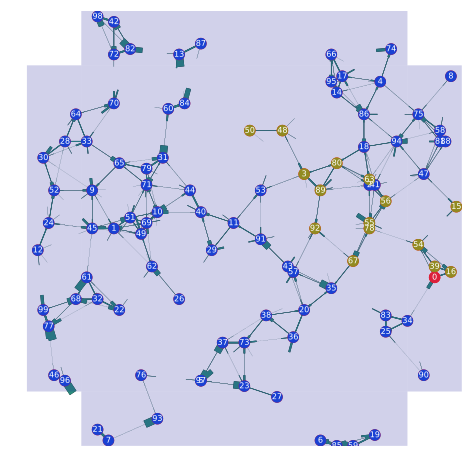

In [13]:
plt.rcParams["figure.figsize"] = (8,8)
b.DrawNetwork(edgelabels=False)

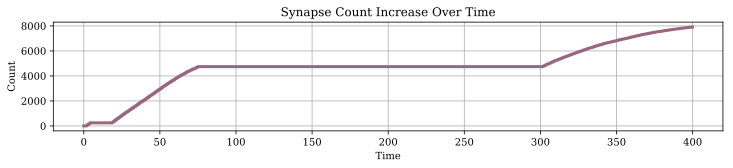

In [14]:
plt.rcParams["figure.figsize"] = (12, 2)
p = plt.plot(b._Neurons[0]._Time,b._SynapseCountHistory)
plt.setp(p, 'Color', [0.6,0.4,0.5], 'linewidth', 3)
plt.grid(True)
plt.ylabel("Count")
plt.xlabel("Time")
plt.title('Synapse Count Increase Over Time')
plt.show()

In [22]:
[(i, i%5<1e-6) for i in b._Neurons[0]._Time[1500:1600]]

[(150.0, True),
 (150.09999999999999, False),
 (150.20000000000002, False),
 (150.30000000000001, False),
 (150.40000000000001, False),
 (150.5, False),
 (150.59999999999999, False),
 (150.70000000000002, False),
 (150.80000000000001, False),
 (150.90000000000001, False),
 (151.0, False),
 (151.09999999999999, False),
 (151.20000000000002, False),
 (151.30000000000001, False),
 (151.40000000000001, False),
 (151.5, False),
 (151.59999999999999, False),
 (151.70000000000002, False),
 (151.80000000000001, False),
 (151.90000000000001, False),
 (152.0, False),
 (152.09999999999999, False),
 (152.20000000000002, False),
 (152.30000000000001, False),
 (152.40000000000001, False),
 (152.5, False),
 (152.59999999999999, False),
 (152.70000000000002, False),
 (152.80000000000001, False),
 (152.90000000000001, False),
 (153.0, False),
 (153.09999999999999, False),
 (153.20000000000002, False),
 (153.30000000000001, False),
 (153.40000000000001, False),
 (153.5, False),
 (153.60000000000002, Fal

Note: The connections are directed since synapses are one sided connections. 

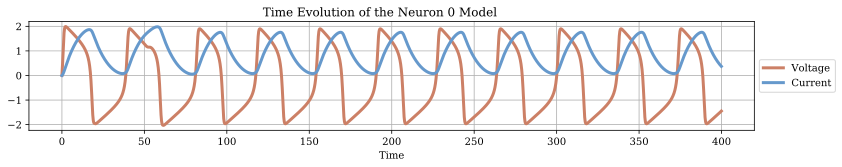

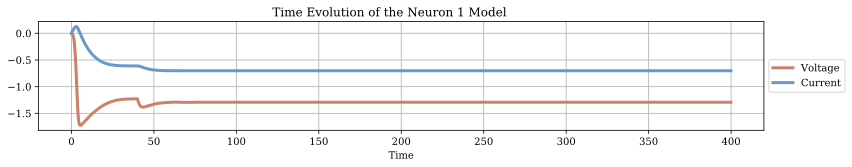

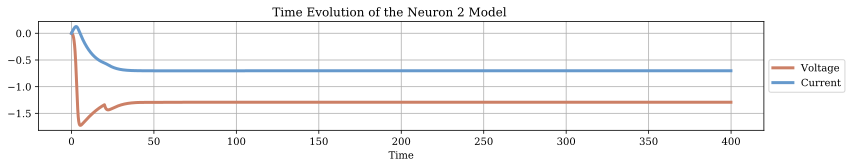

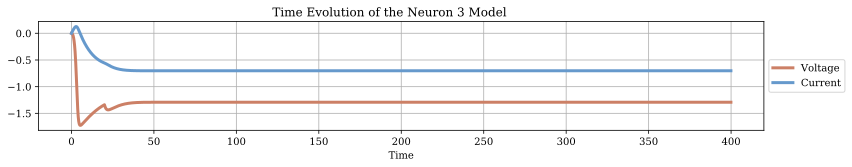

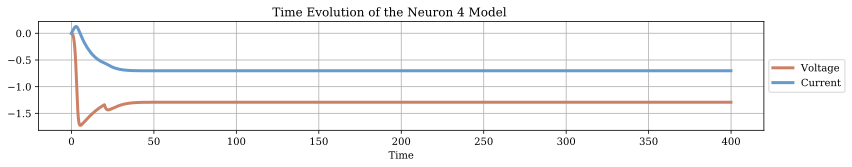

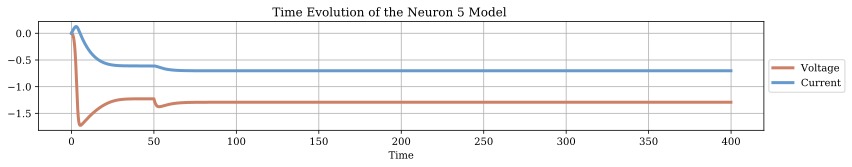

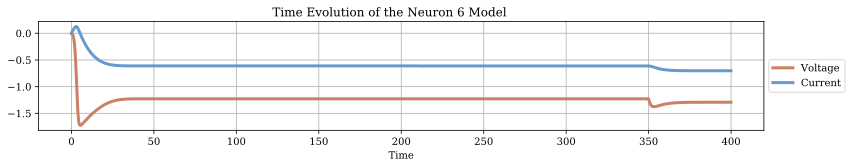

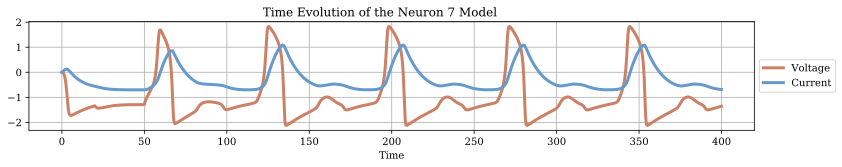

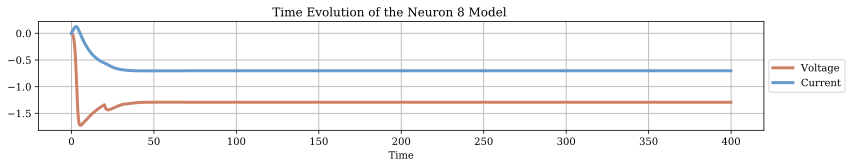

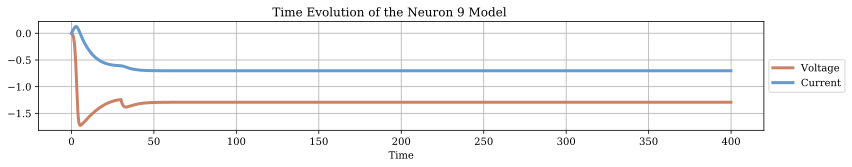

In [6]:
plt.rcParams["figure.figsize"] = (13, 2)
for n in range(displaynum):
    b._Neurons[n].PlotState(states={0:"V",1:"w"},legend=["Voltage","Current"],colors=[[0.8,0.5,0.4],[0.4,0.6,0.8]])

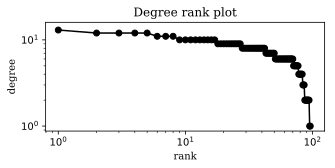

In [7]:
plt.rcParams["figure.figsize"] = (5, 2)
b.NetworkProperties()

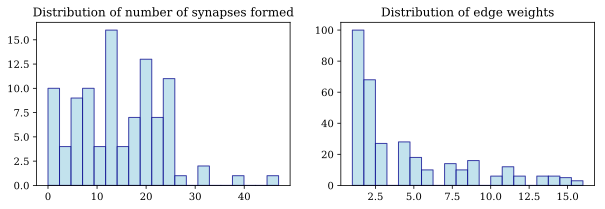

In [8]:
plt.rcParams["figure.figsize"] = (10,3)
plt.subplot(121)
plt.hist([len(n._SynapsedNeurons) for n in b._Neurons], 20,facecolor='lightblue', alpha=0.75, edgecolor='darkblue')
plt.title('Distribution of number of synapses formed')

weights = [b._Network.get_edge_data(n1,n2,default=0)['weight'] for n1,n2 in b._Network.edges()]
plt.subplot(122)
plt.hist(weights, 20, facecolor='lightblue', alpha=0.75, edgecolor='darkblue')
plt.title('Distribution of edge weights')

plt.show()

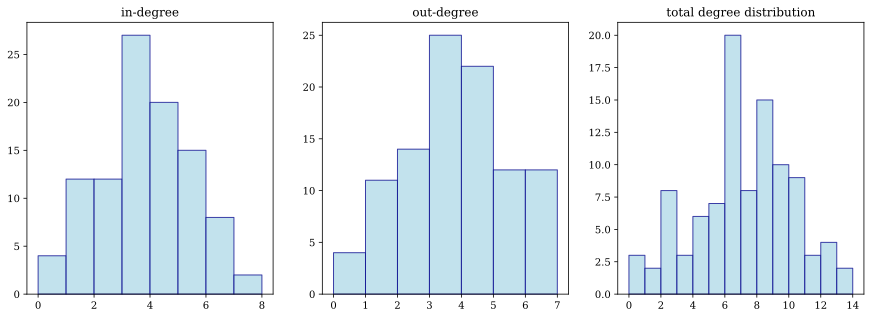

In [9]:
plt.rcParams["figure.figsize"] = (15,5)
idegree = list(b._Network.in_degree().values())
odegree = list(b._Network.out_degree().values())

try:
    plt.subplot(131)
    plt.hist(idegree, max(idegree), facecolor='lightblue', alpha=0.75, edgecolor='darkblue')
    plt.title('in-degree')
    plt.subplot(132)
    plt.hist(odegree, max(odegree), facecolor='lightblue', alpha=0.75, edgecolor='darkblue')
    plt.title('out-degree')
    plt.subplot(133)
    plt.hist(b._DegreeDistribution, max(b._DegreeDistribution), facecolor='lightblue', alpha=0.75, edgecolor='darkblue')
    plt.title('total degree distribution')
    plt.show()    
except:
    print("No connections at all") 

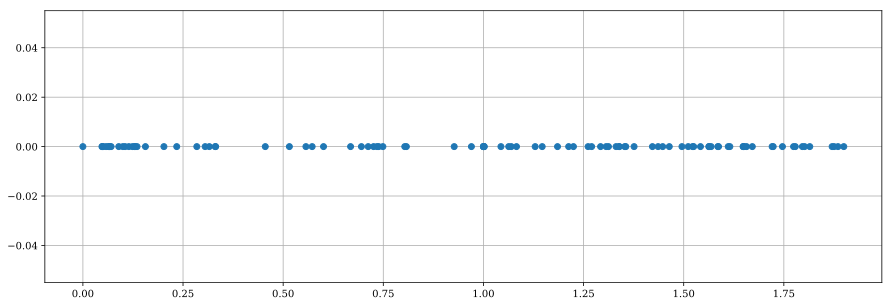

In [10]:
plt.figure()
L = nx.directed_laplacian_matrix(b._Network)
eigs = np.linalg.eigvals(L)
reals = [np.real(n) for n in eigs]
imag  = [np.imag(n) for n in eigs]
plt.rcParams["figure.figsize"] = (7,4)
plt.plot(reals,imag,'o')
plt.grid(True)
plt.show()

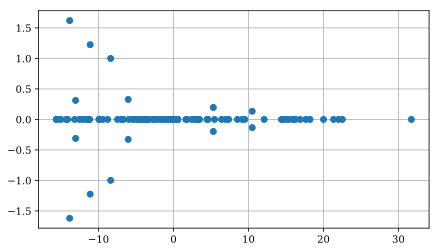

In [11]:
eigs = sorted(nx.adjacency_spectrum(b._Network))
reals = [np.real(n) for n in eigs]
imag  = [np.imag(n) for n in eigs]
plt.rcParams["figure.figsize"] = (7,4)
plt.plot(reals,imag,'o')
plt.grid(True)
plt.show()